# What are the most demanded skills for the top 3 most popular data roles? 

### methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage 
4. Plot final findings

In [75]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda skill_list: (
        ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list
    )
)

In [76]:
df_US = df[df['job_country'] == 'United States']


In [77]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [78]:
df_skills_group = df_skills.groupby(['job_skills','job_title_short']).size()

In [79]:
df_skills_group

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [80]:
type(df_skills_group)

pandas.Series

In [81]:
df_skills_group = df_skills_group.reset_index(name='skill_count')


In [82]:
df_skills_group.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_group

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [83]:
job_titles = df_skills_group['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

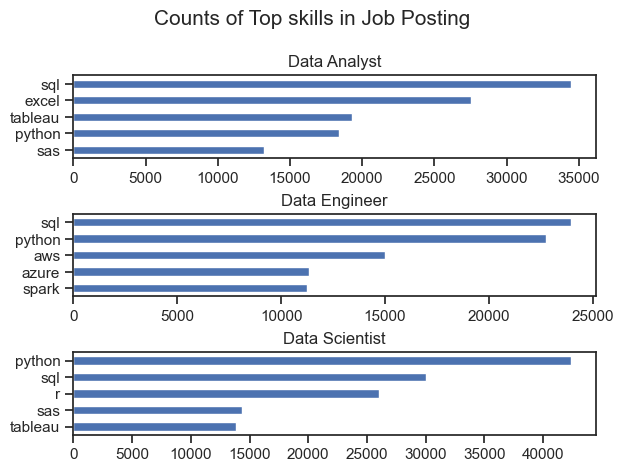

In [84]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_group[df_skills_group['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top skills in Job Posting', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [85]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')


In [86]:
df_skills_perc = pd.merge(df_skills_group, df_job_title_count, how='left', on='job_title_short')

In [87]:
df_skills_perc

,job_skills,job_title_short,skill_count,job_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [88]:
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['job_total']
df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


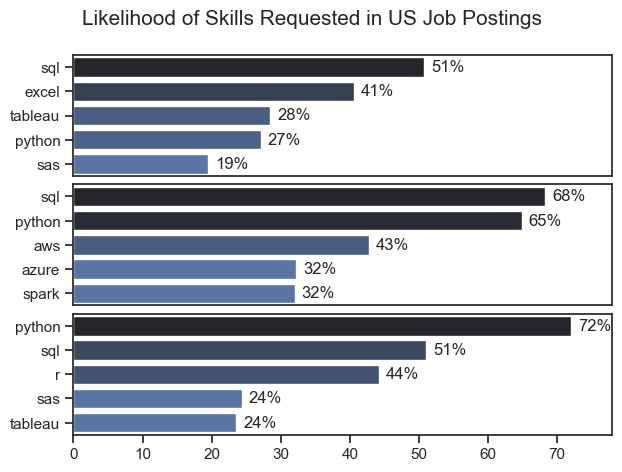

In [90]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    # df_plot.plot(
    #     kind="barh",
    #     x="job_skills",
    #     y="skill_percent",
    #     ax=ax[i],
    #     title=job_title,
    #     legend=False,
    # )

    
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_xlabel('')
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1,n,  f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()